# Decision Tree

### 1. Data Preparation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_excel('heart_disease.xlsx', sheet_name=1);
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


### 2. Exploratory Data Analysis

In [9]:
df.shape

(908, 13)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [11]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0
oldpeak,62


In [15]:
df['oldpeak'] = df['oldpeak'].fillna(df['oldpeak'].median())

In [16]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0
oldpeak,0


In [17]:
df.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.864537,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.060433,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


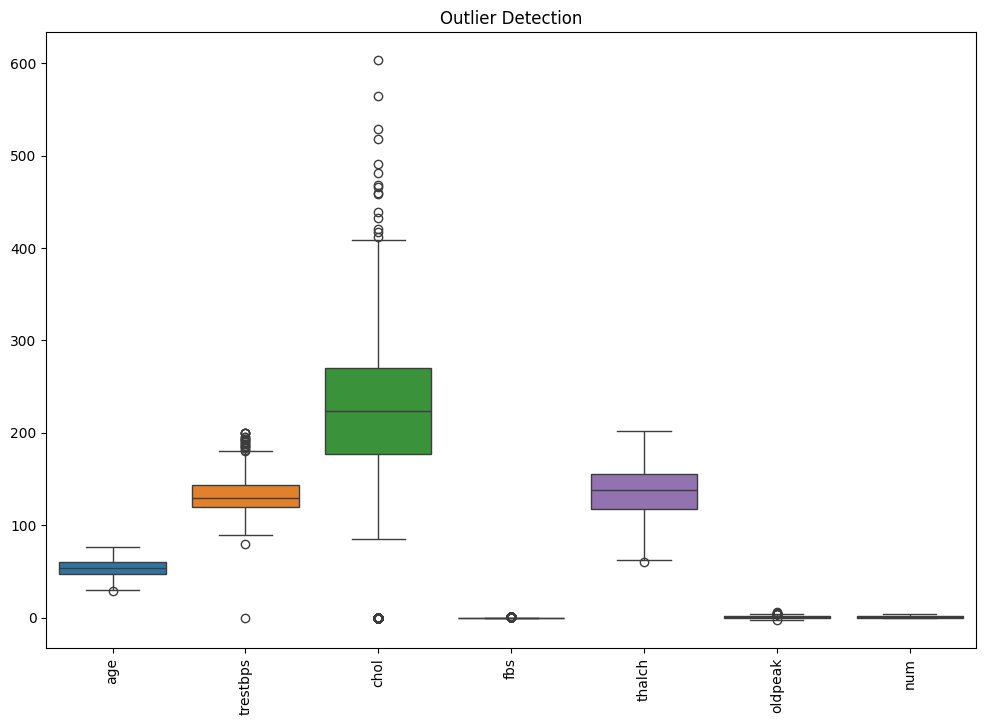

In [18]:
#outlier detection
#box plots
plt.figure(figsize=(12,8))
sns.boxplot(data=df)
plt.title('Outlier Detection')
plt.xticks(rotation=90)
plt.show()

Here the outliers are observed in the chol (cholesterol) feature, with several values lying far above the upper whisker. These outliers likely represent patients with abnormally high cholesterol levels, which are clinically meaningful in a heart disease dataset. Since Decision Tree classifiers are robust to outliers the identified outliers were retained in the dataset.

<Figure size 1200x800 with 0 Axes>

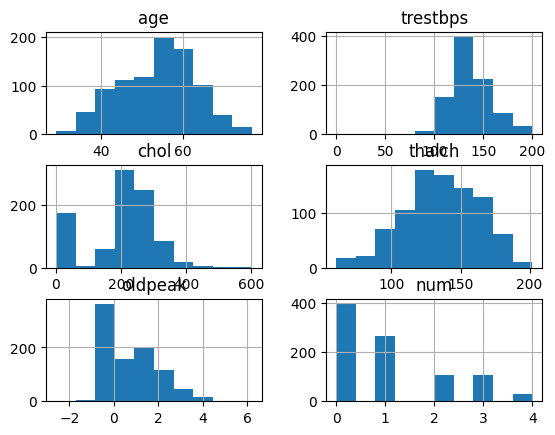

In [19]:
#histogram
plt.figure(figsize=(12,8))
df.hist()
plt.show()

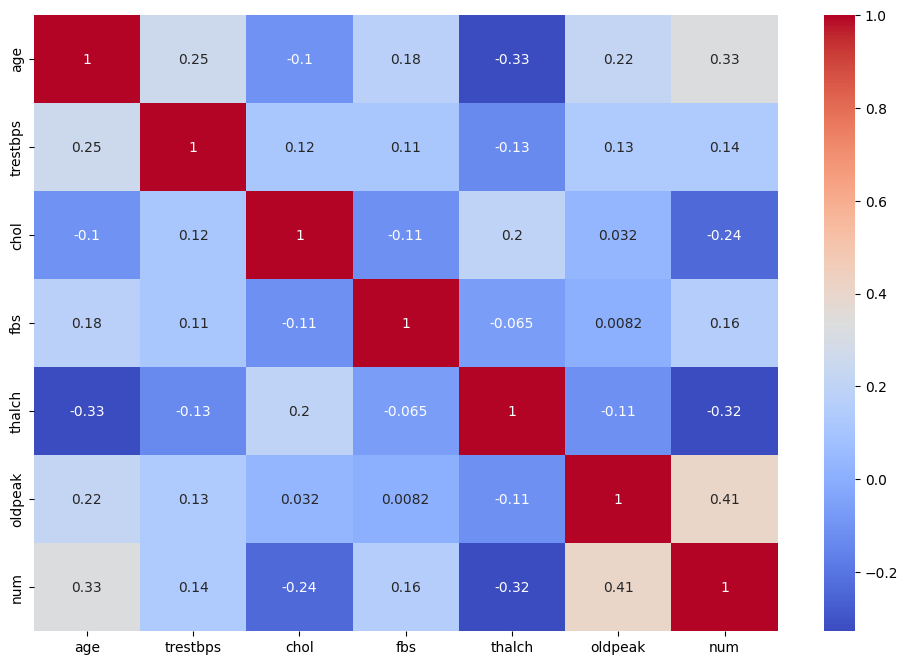

In [21]:
#correlation matrix
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.show()

In [22]:
df.duplicated().sum()

np.int64(1)

### 3. Feature Engineering

In [23]:
#Encoding categorical variables
df.dtypes

,0
age,int64
sex,object
cp,object
trestbps,int64
chol,int64
fbs,bool
restecg,object
thalch,int64
exang,object
oldpeak,float64


In [25]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

cat_cols=['sex','cp','fbs', 'restecg', 'exang', 'slope', 'thal']

for col in cat_cols:
  df[col] = df[col].astype(str)
  df[col] = le.fit_transform(df[col])

In [26]:
df[cat_cols].head()

,sex,cp,fbs,restecg,exang,slope,thal
0,1,3,1,0,1,0,0
1,1,1,0,1,1,1,0
2,1,0,0,1,1,1,0
3,1,3,0,0,1,1,0
4,1,0,0,1,3,1,0


### 4. Decision Tree Classification

In [39]:
from sklearn.model_selection import train_test_split

x=df.drop('num',axis=1)
y=df['num'].apply(lambda x: 0 if x==0 else 1)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [41]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=5,
    min_samples_split=10,
    min_samples_leaf=5,random_state=42, class_weight='balanced')
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5, min_samples_leaf=5,
                       min_samples_split=10, random_state=42)

In [44]:
#Model Prediction
y_pred = dt.predict(X_test)
y_prob = dt.predict_proba(X_test)[:,1]

In [45]:
#Model Evaluation Metrics
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr', average='weighted')

print("Accuracy:", accuracy)
print("ROC AUC Score:", roc_auc)
print(classification_report(y_test, y_pred))

Accuracy: 0.7362637362637363
ROC AUC Score: 0.829346381539205
              precision    recall  f1-score   support

           0       0.70      0.82      0.75        89
           1       0.79      0.66      0.72        93

    accuracy                           0.74       182
   macro avg       0.74      0.74      0.74       182
weighted avg       0.74      0.74      0.73       182



After converting the problem into binary classification, the Decision Tree classifier demonstrated significantly improved performance. The model achieved an accuracy of 73.6% and a ROC-AUC score of 0.83, indicating strong discriminative ability. The balanced precision and recall values suggest effective detection of both diseased and non-diseased cases, making the model suitable for heart disease prediction.

### 5. Hyperparameter Tuning

In [46]:
from sklearn.model_selection import GridSearchCV

param_grid ={
    'max_depth':[3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'criterion' : ['gini', 'entropy']
}

grid = GridSearchCV(DecisionTreeClassifier(random_state=42),
                    param_grid,
                    cv = 5,
                    scoring='f1',
                    n_jobs=-1
)

grid.fit(X_train, y_train)
best_model = grid.best_estimator_

In [47]:
y_pred_best = best_model.predict(X_test)
y_prob_best = best_model.predict_proba(X_test)[:,1]

print(classification_report(y_test, y_pred_best))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_best))

              precision    recall  f1-score   support

           0       0.79      0.75      0.77        89
           1       0.77      0.81      0.79        93

    accuracy                           0.78       182
   macro avg       0.78      0.78      0.78       182
weighted avg       0.78      0.78      0.78       182

ROC-AUC: 0.8458378639603722


After hyperparameter tuning, the Decision Tree classifier achieved improved performance with an accuracy of 78% and balanced precision, recall, and F1-scores across both classes.

### 6. Model Evaluation and Analysis

In [51]:
#feature important analysis
feature_importance = pd.DataFrame({
    'Feature':x.columns,
    'Importance':best_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

feature_importance

,Feature,Importance
2,cp,0.543029
4,chol,0.239100
8,exang,0.123681
0,age,0.076858
9,oldpeak,0.017333
1,sex,0.000000
3,trestbps,0.000000
5,fbs,0.000000
7,thalch,0.000000
6,restecg,0.000000


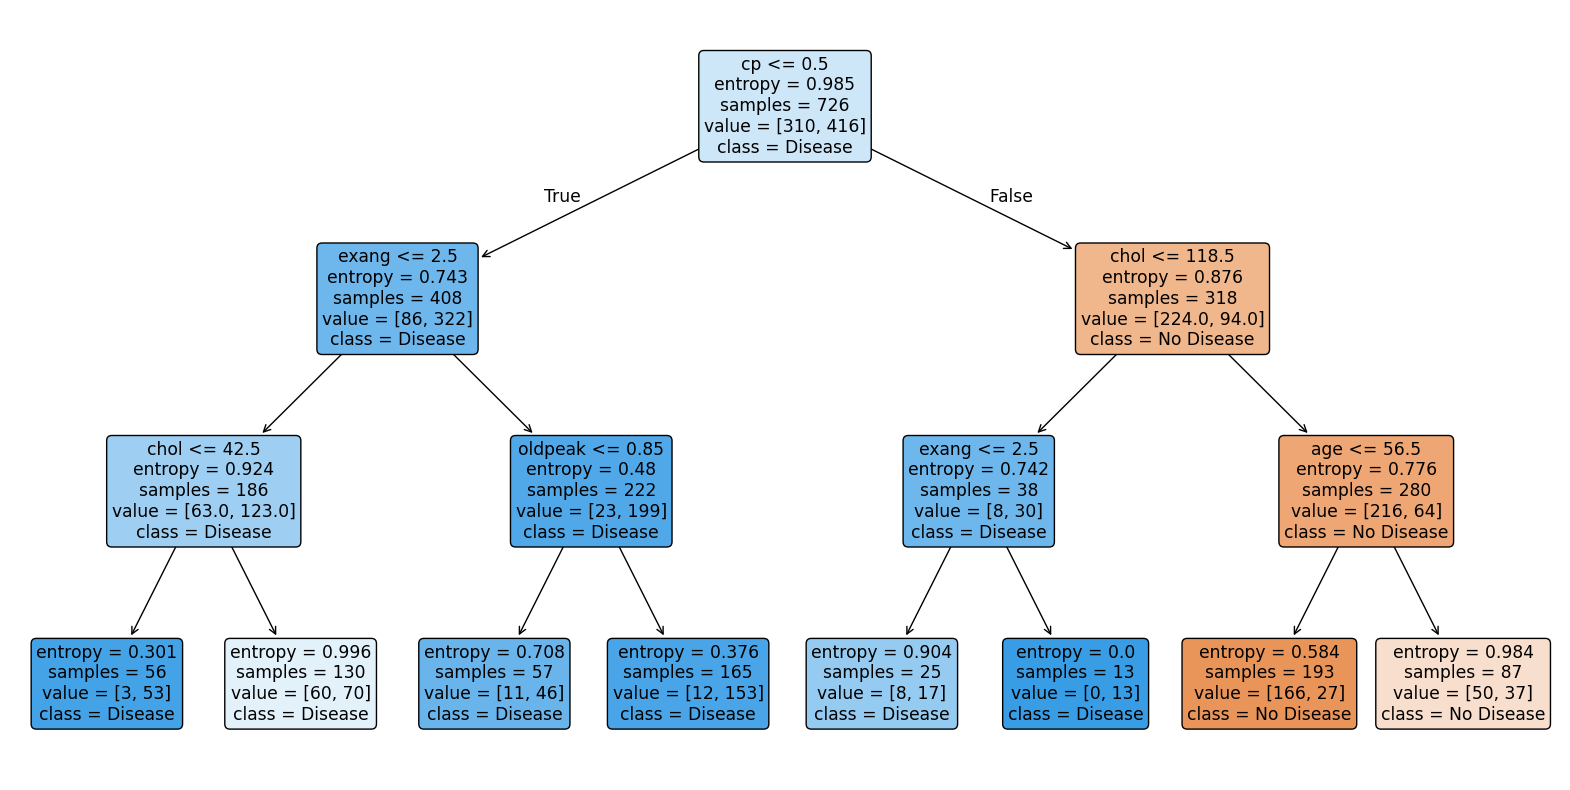

In [52]:
#Decision Tree Visualization
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(
    best_model,
    feature_names=x.columns,
    class_names=['No Disease', 'Disease'],
    filled=True,
    rounded=True
)
plt.show()

The Decision Tree classifier reveals that chest pain type (cp) is the most influential factor in predicting heart disease then exercise-induced angina (exang), cholesterol level (chol), ST depression (oldpeak), and age. The tree structure shows clear and interpretable decision rules, making it suitable for medical diagnosis.

### Interview Questions

1. Common hyperparameters of decision tree models are as follows:

*   max_depth – controls tree depth; prevents overfitting
*   min_samples_split – minimum samples to split a node

*   criterion – impurity measure (gini, entropy)
*  min_samples_leaf – minimum samples at leaf node List item


*   max_features – number of features considered at each split
*   class_weight – handles class imbalance







2.Difference between Label and One Hot Encoding are as follows:

Label Encoding:

*   Converts categories into numeric labels
*   Introduces ordinal relationship
*   Suitable for tree-based models

One-Hot Encoding:


*   Creates binary columns for each category
*   Increases dimensionality
*   No order relationship



